# Определение перспективного тарифа для телеком-компании

Клиентам федерального оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра».

Чтобы скорректировать рекламный бюджет, коммерческому департаменту необходимо понять, какой тариф приносит больше денег. В ходе проекта предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. Изучим данные 500 пользователей оператора: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Проанализируем поведение клиентов и сделаем вывод — какой тариф лучше.

**Описание тарифов**

*Тариф «Смарт»*

1.Ежемесячная плата: 550 рублей

2.Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

3.Стоимость услуг сверх тарифного пакета:
<li>минута разговора: 3 рубля
<li>сообщение: 3 рубля
<li>1 Гб интернет-трафика: 200 рублей
    
*Тариф «Ультра»*
1.Ежемесячная плата: 1950 рублей
    
2.Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    
3.Стоимость услуг сверх тарифного пакета:
<li>минута разговора: 1 рубль
<li>сообщение: 1 рубль
<li>1 Гб интернет-трафика: 150 рублей

**Примечание**

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. Примите, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

**Описание данных**

Таблица users (информация о пользователях):
<li>user_id — уникальный идентификатор пользователя
<li>first_name — имя пользователя
<li>last_name — фамилия пользователя
<li>age — возраст пользователя (годы)
<li>reg_date — дата подключения тарифа (день, месяц, год)
<li>churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
<li>city — город проживания пользователя
<li>tariff — название тарифного плана
    
Таблица calls (информация о звонках):
<li>id — уникальный номер звонка
<li>call_date — дата звонка
<li>duration — длительность звонка в минутах
<li>user_id — идентификатор пользователя, сделавшего звонок
    
Таблица messages (информация о сообщениях):
<li>id — уникальный номер сообщения
<li>message_date — дата сообщения
<li>user_id — идентификатор пользователя, отправившего сообщение
    
Таблица internet (информация об интернет-сессиях):
<li>id — уникальный номер сессии
<li>mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
<li>session_date — дата интернет-сессии
<li>user_id — идентификатор пользователя
    
Таблица tariffs (информация о тарифах):
<li>tariff_name — название тарифа
<li>rub_monthly_fee — ежемесячная абонентская плата в рублях
<li>minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
<li>messages_included — количество сообщений в месяц, включённых в абонентскую плату
<li>mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
<li>rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
<li>rub_per_message — стоимость отправки сообщения сверх тарифного пакета
<li>rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Откроем файлы с данными и изучим общую информацию

In [1]:
#Импорт библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
#Считаем датасет (информацию о пользователях)
# Изучим основноую информацию о датасете
users = pd.read_csv('/datasets/users.csv')
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [3]:
#Считаем датасет (информацию о звонках)
# Изучим основноую информацию о датасете
calls = pd.read_csv('/datasets/calls.csv')
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
#Считаем датасет (информацию о  сообщениях)
# Изучим основноую информацию о датасете
messages = pd.read_csv('/datasets/messages.csv')
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [5]:
#Считаем датасет (информацию об интернет-сессиях)
# Изучим основноую информацию о датасете
internet = pd.read_csv('/datasets/internet.csv')
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
#Считаем датасет (информацию о  тарифах)
# Изучим основноую информацию о датасете
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
# удалим ошибочный столбец "Unnamed: 0" в таблице internet
del internet['Unnamed: 0'] 

In [10]:
# проверим, что столбец удалился
internet.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 149396 entries, 0 to 149395

Data columns (total 4 columns):

 #   Column        Non-Null Count   Dtype  

---  ------        --------------   -----  

 0   id            149396 non-null  object 

 1   mb_used       149396 non-null  float64

 2   session_date  149396 non-null  object 

 3   user_id       149396 non-null  int64  

dtypes: float64(1), int64(1), object(2)

memory usage: 4.6+ MB


Вывод

Импортировали библиотеки, прочитали файлы с данными.

## Подготовим данные

Приведем данные к нужным типам. На прошлом шаге отметили, что дата не приведена к формату datetime - исправим это.

In [13]:
# для столбцов с датами изменим тип данных на datetime64
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

В процессе обработки данных нашли следующие ошибки:

<li>в таблице internet был найден некорректный столбец Unnamed: 0 - избавились от него
<li>формат столбцов с датами был некорректным - исправили формат
<li>длительность многих звонков — 0.0 минут. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять. Оставим их как есть. К тому же, они никак не повлияют на сумму использованных минут.
<li>трафик интернета указан в мегабайтах. В процессе группирования данных преобразуем трафик в гигабайты для удобства подсчета

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам и объединим данные в удобную таблицу.

In [14]:
# отдельно выведем в таблицах месяц пользования услугой
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month 
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [15]:
# но сначала учтем, что «Мегалайн» всегда округляет секунды до минут. 
# Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
calls['duration'] = np.ceil(calls['duration']).astype('Int64')

In [16]:
# создадим сводную таблицу и посчитаем кол-во сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя
calls_pivot_table = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count','sum']).astype('Int64')
calls_pivot_table.columns = ['calls_count','duration_sum']
calls_pivot_table.head(10)

calls_count  duration_sum
user_id month                           
1000    5               22           159
        6               43           172
        7               47           340
        8               52           408
        9               58           466
        10              57           350
        11              43           338
        12              46           333
1001    11              59           430
        12              63           414

In [17]:
# создадим сводную таблицу и посчитаем кол-во отправленных сообщений по месяцам для каждого пользователя
messages_pivot_table = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count']).astype('Int64')
messages_pivot_table.columns = ['messages_count']
messages_pivot_table.head(10)

messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

In [18]:
# создадим сводную таблицу и посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя
# Также учтем, что «Мегалайн» всегда округляет мегабайты до гигабайт. 
# Для интернет-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. 
# Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 
# Посчитаем трафик за месяц и поделим на 1024, округлив до целых в большую сторону
internet_pivot_table = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
internet_pivot_table.columns = ['internet_sum']
internet_pivot_table['internet_sum_gb'] = (internet_pivot_table['internet_sum'] / 1024).apply(np.ceil).astype('Int64')

internet_pivot_table.head(10)

internet_sum  internet_sum_gb
user_id month                               
1000    5           2253.49                3
        6          23233.77               23
        7          14003.64               14
        8          14055.93               14
        9          14568.91               15
        10         14702.49               15
        11         14756.47               15
        12          9817.61               10
1001    11         18429.34               18
        12         14036.66               14

In [19]:
# объединим все сводные таблицы в одну
all_pivot = pd.concat([calls_pivot_table, messages_pivot_table, internet_pivot_table], sort=True, axis=1).reset_index()
all_pivot.head()

,user_id,month,calls_count,duration_sum,messages_count,internet_sum,internet_sum_gb
0,1000,5,22,159,22,2253.49,3
1,1000,6,43,172,60,23233.77,23
2,1000,7,47,340,75,14003.64,14
3,1000,8,52,408,81,14055.93,14
4,1000,9,58,466,57,14568.91,15


In [20]:
# соединим сводные таблицы по user_id с информацией о пользователях
total_stats = all_pivot.merge(users, on='user_id', how='left')
total_stats.head(10)

,user_id,month,calls_count,duration_sum,messages_count,internet_sum,internet_sum_gb,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22,159,22,2253.49,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,172,60,23233.77,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,340,75,14003.64,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,408,81,14055.93,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,466,57,14568.91,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10,57,350,73,14702.49,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11,43,338,58,14756.47,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12,46,333,70,9817.61,10,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11,59,430,<NA>,18429.34,18,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,63,414,<NA>,14036.66,14,41,NaT,Москва,Иван,Ежов,2018-11-01,smart


In [21]:
# удалим столбцы, которые нам не пригодятся чтобы легче было ориентироваться в таблице
total_stats = total_stats.drop(['churn_date', 'first_name', 'last_name', 'reg_date'], axis='columns')
total_stats.head(2)

,user_id,month,calls_count,duration_sum,messages_count,internet_sum,internet_sum_gb,age,city,tariff
0,1000,5,22,159,22,2253.49,3,52,Краснодар,ultra
1,1000,6,43,172,60,23233.77,23,52,Краснодар,ultra


In [22]:
# добавим к total_stats информацию о тарифах из таблицы tariffs
# объединим таблицы по колонке с названиями тарифов
# для этого сначала в tariffs поменяем название нужного столбца на tariff

tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee',\
                      'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
# применим метод merge, параметру "on" передадим колонку с названиями тарифов, параметр "how" по умолчанию "inner"

total_stats =total_stats.merge(tariffs, on='tariff')
total_stats.head()

,user_id,month,calls_count,duration_sum,messages_count,internet_sum,internet_sum_gb,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,2253.49,3,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,23233.77,23,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,14003.64,14,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,14055.93,14,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,14568.91,15,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1


После объединения таблиц образовалось немало пропусков, особенно в messages_count. Это произошло из-за разницы в исходных данных (см. "Общая информация о данных"). Оставить как есть или отбросить их не вариант, т.к. в первом случае они повляют на дальнейшие расчеты, а во втором потеряем много данных. Поэтому заменим все пропуски на ноль.

In [24]:
total_stats.isnull().sum()

user_id                    0
month                      0
calls_count               40
duration_sum              40
messages_count           497
internet_sum              11
internet_sum_gb           11
age                        0
city                       0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [25]:
# пропуски заменим на ноль
total_stats = total_stats.fillna(0)

In [26]:
total_stats.isnull().sum()

user_id                  0
month                    0
calls_count              0
duration_sum             0
messages_count           0
internet_sum             0
internet_sum_gb          0
age                      0
city                     0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

Посчитаем помесячную выручку с каждого пользователя при помощи функции total_bill_monthly, в которой в качестве pd.Series будет выступать строка датафрейма.

In [27]:
def total_bill_monthly(row):
    
#определим переменные
    
    bill_minutes = 0
    bill_sms = 0
    bill_traffic = 0
    minutes = row['duration_sum']
    sms = row['messages_count']
    traffic = row['internet_sum']
    tariff = row['tariff']
    minutes_limit = row['minutes_included']
    sms_limit = row['messages_included']
    traffic_limit = row['mb_per_month_included']
    monthly_fee = row['rub_monthly_fee']
    rub_per_gb = row['rub_per_gb']
    rub_per_message = row['rub_per_message']
    rub_per_minute = row['rub_per_minute']

#проверим разницу между суммарными значениями звонков, сообщений, трафика и бесплатным лимитом тарифа
#если эта разница меньше нуля, то возвращаем ноль - клиент не израсходовал бесплатный лимит
#если больше - то разницу умножаем на стоимость сверх тарифного плана
    
    if minutes > minutes_limit:
        bill_minutes += (minutes - minutes_limit) * rub_per_minute
    if minutes < minutes_limit:
        bill_minutes = 0
    if sms > sms_limit:
        bill_sms += (sms - sms_limit) * rub_per_message
    if sms < sms_limit:
        bill_sms = 0
    if traffic > traffic_limit:
        bill_traffic += (np.ceil((traffic - traffic_limit) / 1024 )) * rub_per_gb# округляем мегабайты вверх до гигабайт
    if traffic < traffic_limit:
        bill_traffic = 0
        
#функция возвращает итоговый счет за месяц для клиента,
#в котором к сумме счетов за отдельные категории услуг прибавляется абонентская плата за тариф
        
    return bill_minutes + bill_sms + bill_traffic + monthly_fee

In [28]:
#применим функцию к датафрейму
#метод apply() применяем в нашем случае ко всему датафрейму
#Чтобы на вход в функцию отправлялись строки, указываем параметр axis = 1 метода apply()

total_stats['total_bill'] = total_stats.apply(total_bill_monthly, axis=1)
total_stats

,user_id,month,calls_count,duration_sum,messages_count,internet_sum,internet_sum_gb,age,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,total_bill
0,1000,5,22,159,22,2253.49,3,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43,172,60,23233.77,23,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47,340,75,14003.64,14,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52,408,81,14055.93,14,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58,466,57,14568.91,15,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41,247,42,20579.36,21,68,Владикавказ,smart,50,15360,500,550,200,3,3,1750.0
3210,1499,9,9,70,11,1845.75,2,35,Пермь,smart,50,15360,500,550,200,3,3,550.0
3211,1499,10,68,449,48,17788.51,18,35,Пермь,smart,50,15360,500,550,200,3,3,1150.0
3212,1499,11,74,612,59,17963.31,18,35,Пермь,smart,50,15360,500,550,200,3,3,1513.0


Вывод

Привели данные к нужным типам, нашли и исправили ошибки. Сгруппировали данные в таблицы, посчитали помесячную выручку с каждого пользователя. 

## Проанализируем данные

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

In [29]:
# выделим данные по каждому тарифу в отдельную таблицу из таблицы с пользователями
smart_total_stats = total_stats[total_stats['tariff'] == 'smart']
ultra_total_stats = total_stats[total_stats['tariff'] == 'ultra']

Звонки, мин.


'Описательная статистика минут, потраченных на звонки, в месяц на тарифе smart:'

count    2229.000000
mean      417.934948
std       190.313730
min         0.000000
25%       282.000000
50%       422.000000
75%       545.000000
max      1435.000000
Name: duration_sum, dtype: float64

'Дисперсия: 36219.32'

'Описательная статистика минут, потраченных на звонки, в месяц на тарифе ultra:'

count     985.000000
mean      526.623350
std       317.606098
min         0.000000
25%       284.000000
50%       518.000000
75%       752.000000
max      1673.000000
Name: duration_sum, dtype: float64

'Дисперсия: 100873.63'

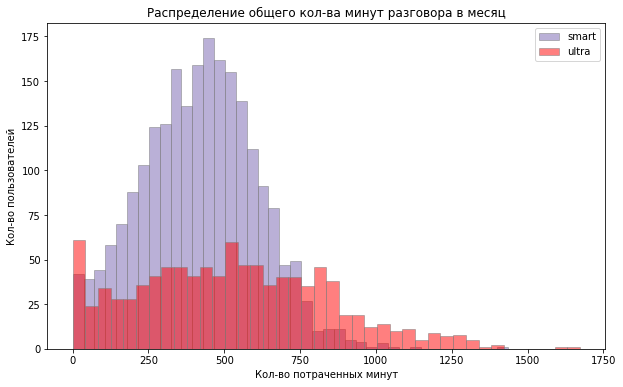

Сообщения, шт.


'Описательная статистика количества сообщений в месяц на тарифе smart:'

count    2229.000000
mean       33.384029
std        28.227876
min         0.000000
25%        10.000000
50%        28.000000
75%        51.000000
max       143.000000
Name: messages_count, dtype: float64

'Дисперсия: 796.81'

'Описательная статистика количества сообщений в месяц на тарифе ultra:'

count    985.000000
mean      49.363452
std       47.804457
min        0.000000
25%        6.000000
50%       38.000000
75%       79.000000
max      224.000000
Name: messages_count, dtype: float64

'Дисперсия: 2285.27'

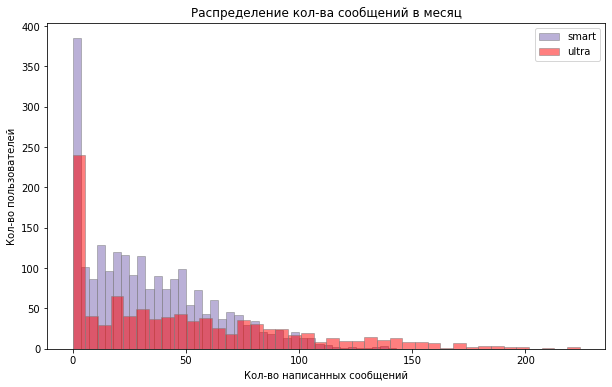

Интернет, Гб


'Описательная статистика объема интернет-трафика в месяц на тарифе smart:'

count    2229.000000
mean       16.328847
std         5.747061
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: internet_sum_gb, dtype: float64

'Дисперсия: 33.03'

'Описательная статистика объема интернет-трафика в месяц на тарифе ultra:'

count    985.000000
mean      19.494416
std        9.853511
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: internet_sum_gb, dtype: float64

'Дисперсия: 97.09'

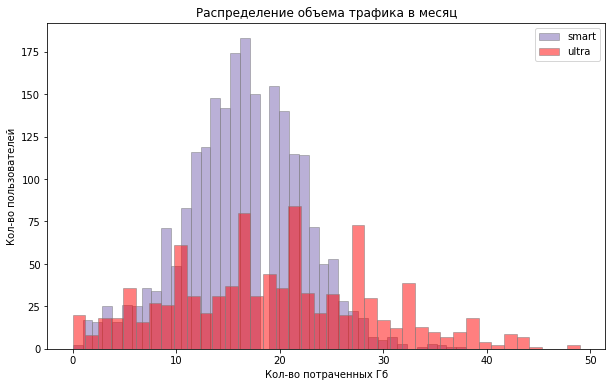

In [30]:
# теперь посмотртим на дисперсию и стандартное отклонение, вызвав метод describe. 
# Построим гистограммы для распределения количества звонков, смс и объёма трафика
def distribution(elem): 
    if elem == 'duration_sum':
        print('Звонки, мин.')
        display('Описательная статистика минут, потраченных на звонки, в месяц на тарифе smart:',
                smart_total_stats[elem].describe(), 
                f'Дисперсия: {round(smart_total_stats[elem].var(),2)}')
        display('Описательная статистика минут, потраченных на звонки, в месяц на тарифе ultra:', 
                ultra_total_stats[elem].describe(),
               f'Дисперсия: {round(ultra_total_stats[elem].var(),2)}')
    elif elem == 'messages_count':
        print('Сообщения, шт.')
        display('Описательная статистика количества сообщений в месяц на тарифе smart:', 
                smart_total_stats[elem].describe(),
               f'Дисперсия: {round(smart_total_stats[elem].var(),2)}')
        display('Описательная статистика количества сообщений в месяц на тарифе ultra:', 
                ultra_total_stats[elem].describe(),
               f'Дисперсия: {round(ultra_total_stats[elem].var(),2)}')
    else:
        print('Интернет, Гб')
        display('Описательная статистика объема интернет-трафика в месяц на тарифе smart:', 
                smart_total_stats[elem].describe(),
               f'Дисперсия: {round(smart_total_stats[elem].var(),2)}')
        display('Описательная статистика объема интернет-трафика в месяц на тарифе ultra:', 
                ultra_total_stats[elem].describe(),
               f'Дисперсия: {round(ultra_total_stats[elem].var(),2)}')

# список из столбцов, которые будем исследовать
list = ['duration_sum', 'messages_count', 'internet_sum_gb']

# применим функцию ко всем столбцам и построим гистограммы
for item in list:
    distribution(item)
    smart_total_stats[item].plot(kind='hist', bins=40, figsize=(10,6), ec='grey', color='#7663b0',
                                 alpha=0.5, label = 'smart')
    ultra_total_stats[item].plot(kind='hist', bins=40, figsize=(10,6), ec='grey', color='r', 
                                 alpha=0.5, label = 'ultra')   
    if item == 'duration_sum':
        plt.title('Распределение общего кол-ва минут разговора в месяц')
        plt.xlabel('Кол-во потраченных минут')
        
    elif item == 'messages_count':
        plt.title('Распределение кол-ва сообщений в месяц')
        plt.xlabel('Кол-во написанных сообщений')
       
    else:
        plt.title('Распределение объема трафика в месяц')
        plt.xlabel('Кол-во потраченных Гб')
        
    plt.ylabel('Кол-во пользователей')
    plt.legend(loc = 'best')
    plt.show()

На данных выборки по клиентам "Мегалайн" получены усредненные значения по количеству минут разговоров, сообщений и интернета ежемесячно для каждого тарифа. Рассчитаны среднее, медиана, дисперсия и стандартное отклоение по каждой из предоставленных услуг связи.

* Характеристики количества минут, потраченных на звонки, в месяц: 
| Тариф  | Среднее| Медиана | Дисперсия  |Стандартное отклонение|
| -------|:----:|:------:|:---------:|:----------------:|
| smart  |418   |422     |36219      |190               |    
| ultra  |527   |518     |100874     |318               |   

На тарифе smart пользователи разговаривают в среднем 418 минут в месяц при лимите в 500 минут по тарифу, пользователи практически расходуют весь лимит по минутам. Также в распределении видно большое количество пользователей (более 500 человек), которые выходят за пределы лимита в 500 минут, установленного тарифным планом.

На тарифе ultra пользователи разговаривают в среднем 527 минут в месяц при лимите в 3000 минут по тарифу. Если посмотреть на гистограмму общего количества минут разговоров, то для тарифа smart она имеет колоколообразную форму с ярко выраженным средним, а для тарифа ultra распределение больше похоже на прямую горизонтальную линию (пересекающую вертикальную ось по значению около 40 пользователей). Такое поведение сохраняется у распределения до границы в 800 минут, затем резкий спад. Получается, для тарифа ultra в диапазоне от 250 до 800 минут по количеству потраченных минут пользователи распределены практически равномерно. Резкий спад наступает после 800 минут. Это же наблюдение подтверждается очень большим значением дисперсии, и, соответственно, стандартного отклонения. 

* Характеристики количества сообщений, отправленных за месяц: 
| Тариф  | Среднее| Медиана | Дисперсия  |Стандартное отклонение|
| -------|:----:|:------:|:---------:|:----------------:|
| smart  |33    |28      |797       |28                |    
| ultra  |49    |38      |2285       |48                |   

На тарифе smart в среднем за месяц один пользователь отправляет 33 сообщения, а на тарифе ultra - 49. Учитывая включенные в тариф пакеты в 50 и 1000 сообщений, пользователи обоих тарифов неактивно расходуют эту услугу. Совершенно нет потребности в 1000 сообщений на тарифе ultra, так как в среднем за месяц пользователи тратят лишь 49 / 1000 = 5% от предоставленного лимита.


* Характеристики использованного объема интернет-трафика, в гигабайтах за месяц: 
| Тариф  | Среднее| Медиана | Дисперсия  |Стандартное отклонение|
| -------|:----:|:------:|:---------:|:----------------:|
| smart  |16    |17      |33         |6                 |    
| ultra  |19    |19      |97         |10                |   

На тарифе smart в среднем за месяц один пользователь тратит 16 Гб интернет-трафика, а на тарифе ultra - 19. Учитывая включенные в тариф пакеты в 15 и 30 Гб, соответственно, пользователи тарифа smart используют предоставленный лимит целиком и очень часто им приходится выходить за рамки лимита и оплачивать дополнительный трафик. Пользователи тарифа ultra используют больше интернета (медиана = 19 Гб) по сравнению с пользователями тарифа smart (медиана = 17 Гб), но и тарифный лимит у них в два раза выше, поэтому они даже не приближаются к установленной границе по трафику.

## Проверим гипотезы

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Сформулируем нулевую и альтернативную гипотезы. Нулевую гипотезу будем формулировать так, чтобы использовать знак равенства. Альтернативную гипотезу сформулируем оттакливаясь от нулевой гипотезы.

<li>H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» равна
<li>H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» не равна

In [59]:
smart_ttest = total_stats[total_stats['tariff']=='smart']['total_bill']
ultra_ttest = total_stats[total_stats['tariff']=='ultra']['total_bill']

# уровень значимости зададим равным 5%
alpha = 0.05

results = st.ttest_ind(smart_ttest, ultra_ttest, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250

Отвергаем нулевую гипотезу


Отвергаем первую гипотезу. Всё же между выручкой есть разница. Выручка с пользователей тарифа ultra больше даже несмотря на то, что тариф выбирают в 2 раза реже.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезы:

<li>H₀ - средняя выручка пользователей из Москвы и остальных регионов равна
<li>H₁ - средняя выручка пользователей из Москвы и остальных регионов не равна

In [60]:
from_Moscow = total_stats.query('city == "Москва"')
not_from_Moscow = total_stats.query('city != "Москва"')

In [61]:
results = st.ttest_ind(
    from_Moscow['total_bill'],
    not_from_Moscow['total_bill']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print()    
print('Средняя выручка в месяц с пользователя из Москвы', from_Moscow['total_bill'].mean().round(2))
print('Средняя выручка в месяц с пользователя не из Москвы', not_from_Moscow['total_bill'].mean().round(2))

p-значение: 0.5440152911670224

Не получилось отвергнуть нулевую гипотезу



Средняя выручка в месяц с пользователя из Москвы 1546.71

Средняя выручка в месяц с пользователя не из Москвы 1524.94


Вторую гипотезу отвергнуть не удалось - выручка с пользователей-москвичей и пользователей из других регионов почти равнозначна.

Вывод

Проверили 2 гипотезы:

1.Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - отвергли

2.Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов - отвергнуть не удалось

##  Общий вывод

В ходе работы:

1.Объединили датасеты в один.

2.Привели данные к нужным типам, нашли и исправили ошибки. Создали датасеты со средней выручкой в месяц в зависимости от тарифа.

3.Выяснили, что пользователи smart тарифа используют чуть меньшее количество минут звонков и сообщений в месяц, чем пользователи ultra. Лимита на звонки и минуты в ultra в среднем не достигает никто. При этом интернетом пользователи ultra пользуются гораздо активнее. Скорее всего, пользователи ultra выбирают этот тариф из-за большего интернет-трафика.

4.Проверили 2 гипотезы:

<li>Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна - отвергли
<li>Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов - отвергнуть не удалось
    
Тариф ultra приносит компании большую выручку,чем тариф smart. Стоит сфокусироваться на его продвижении повсеместно - в Москве и других регионах.